<a href="https://colab.research.google.com/github/MithunSR/Gradient_Descent_Tutorial/blob/main/Gradient_Calculation_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction:
In this colab file, we will explore the process of calculating the gradient of a Convolutional Neural Network (CNN) model for image classification. We will use the CIFAR-10 dataset, which consists of 50,000 training images and 10,000 test images, each belonging to one of ten classes. The goal is to train a CNN model to accurately classify these images.

##Data Loading and Preprocessing:

The CIFAR-10 dataset is loaded using the cifar10.load_data() function from tensorflow.keras.datasets.
The pixel values of the images are normalized to the range [0, 1] by dividing them by 255.
The labels are one-hot encoded using tf.keras.utils.to_categorical().

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to range between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

##CNN Model Definition:

We define a CNN model using the Sequential API from tensorflow.keras.models.
The model consists of three Convolutional layers with ReLU activation, followed by MaxPooling layers.
The output of the convolutional layers is flattened and passed through two fully connected (Dense) layers.
The last layer uses the softmax activation function for multi-class classification.

In [5]:
# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

##Model Compilation:

The model is compiled using the compile() method.
We specify the optimizer as 'adam' and the loss function as 'categorical_crossentropy'.
We also include 'accuracy' as a metric to evaluate the model performance.

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the batch size and number of epochs
batch_size = 64
epochs = 10

# Create a TensorFlow dataset from the training data
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)

# Lists to store loss and gradient values for plotting
loss_history = []
gradient_norm_history = []

##Training Loop:

We define the batch size and number of epochs for training.
A TensorFlow dataset is created from the training data to efficiently iterate over the data in batches.
The training loop iterates over each epoch and each batch of the dataset.
Within each iteration, we use tf.GradientTape() to calculate the gradients of the model parameters with respect to the loss.
The gradients are then applied to the model using the optimizer's apply_gradients() method.

In [7]:
# Training loop
for epoch in range(epochs):
    for X_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            predictions = model(X_batch, training=True)
            loss_value = model.compiled_loss(y_batch, predictions)

        gradients = tape.gradient(loss_value, model.trainable_variables)
        model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Calculate gradient norm for visualization
        gradient_norm = tf.linalg.global_norm(gradients).numpy()

        loss_history.append(loss_value.numpy())
        gradient_norm_history.append(gradient_norm)

    print(f"Epoch {epoch+1}/{epochs} - Loss: {loss_value.numpy():.4f} - Gradient Norm: {gradient_norm:.4f}")

Epoch 1/10 - Loss: 1.9105 - Gradient Norm: 12.9332
Epoch 2/10 - Loss: 1.7540 - Gradient Norm: 12.9859
Epoch 3/10 - Loss: 1.5390 - Gradient Norm: 8.7760
Epoch 4/10 - Loss: 1.3107 - Gradient Norm: 7.7832
Epoch 5/10 - Loss: 1.2361 - Gradient Norm: 11.6203
Epoch 6/10 - Loss: 1.1250 - Gradient Norm: 13.1340
Epoch 7/10 - Loss: 0.9888 - Gradient Norm: 13.6773
Epoch 8/10 - Loss: 0.9449 - Gradient Norm: 15.5536
Epoch 9/10 - Loss: 0.7350 - Gradient Norm: 12.9173
Epoch 10/10 - Loss: 0.6037 - Gradient Norm: 12.4236


##Visualization - Loss and Gradient Norm History:

Lists loss_history and gradient_norm_history are created to store the loss values and gradient norms during training.
After each batch iteration, the loss value and the norm of the gradients are recorded and stored in the respective lists.
At the end of training, the loss history and gradient norm history are plotted using matplotlib.pyplot.

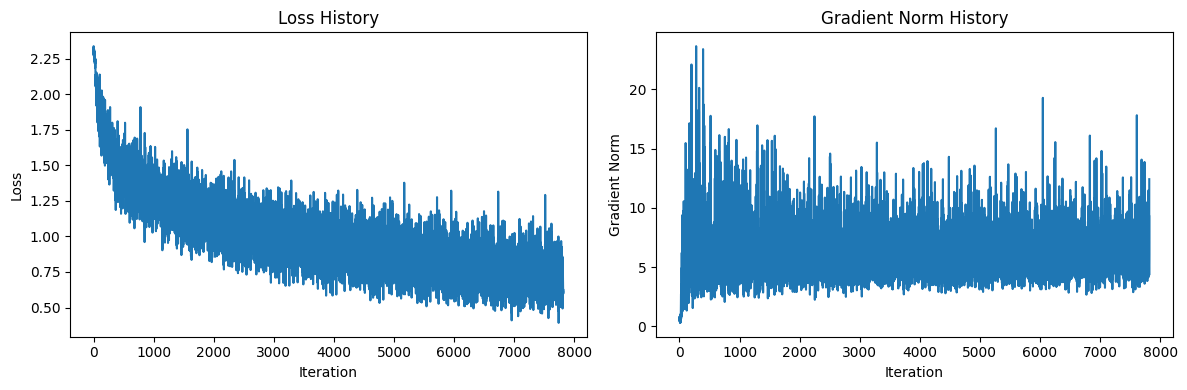

In [8]:
# Plot loss and gradient norm history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(gradient_norm_history)
plt.title('Gradient Norm History')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')

plt.tight_layout()
plt.show()

##Model Evaluation:

Finally, the trained model is evaluated on the test set using the evaluate() method.
The test loss and accuracy are printed.

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 - 1s - loss: 0.9242 - accuracy: 0.6904 - 940ms/epoch - 3ms/step
Test Loss: 0.9242311716079712
Test Accuracy: 0.6904000043869019


By running this colab file, you will be able to train a CNN model on the CIFAR-10 dataset, visualize the loss and gradient norm history during training, and evaluate the model's performance on the test set.